In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv("sample_data/titanic.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###**Handling Missing Values**

In [5]:
df["Age"]= df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###**Feature Engineering**

####Features Created: 1- FamilySize

Combines SibSp (siblings/spouse) and Parch (parents/children) to represent total family size.

Formula: FamilySize = SibSp + Parch + 1 (the passenger is included).

In [8]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

####2- IsAlone

A binary feature that indicates if a passenger is traveling alone.

If FamilySize == 1, then IsAlone = 1; otherwise, 0.

In [9]:
df["IsAlone"] = 0
df.loc[df["FamilySize"]== 1, "IsAlone"]=1

####3- Title

Extracted from the Name column (e.g., Mr., Miss., Dr.).

Helps capture social status, gender, and age-related cues.

Rare titles are grouped under 'Rare' and similar titles are merged (e.g., Mlle → Miss).

These engineered features can improve model performance by adding new meaningful insights not explicitly visible in the original data.

In [10]:
df["Title"] = df["Name"].str.extract(r' ([A-Za-z]+)\.', expand = False)

In [11]:
df["Title"] = df["Title"].replace([
    'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev',
    'Sir', 'Jonkheer', 'Dona'
], 'Rare')
df["Title"] = df["Title"].replace({"Mlle":"Miss", "Ms": "Miss", "Mme": "Mrs"})

In [12]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,0,Mrs


###**Label Encoding**
Machine learning models require all input features to be numeric. However, our dataset still contains categorical variables like Sex, Embarked, and Title. To make these usable by the model, we convert them into numerical form using encoding techniques:

Label Encoding:

Converted the Sex column into binary values:

'male' → 0

'female' → 1

One-Hot Encoding:

For Embarked and Title (which have multiple categories), we created new binary columns for each category using one-hot encoding.

We set drop_first=True to avoid multicollinearity (i.e., avoid dummy variable trap).

In [13]:
# Convert 'Sex' column: male = 0, female = 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

# One-hot encode 'Embarked' (drop_first=True to avoid multicollinearity)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# One-hot encode 'Title' (drop_first=True to avoid multicollinearity)
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

In [14]:
#Drop columns we don't need
df.drop(columns = ["Name","Ticket","Cabin","PassengerId"],axis = 1, inplace = True)

In [15]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22.0,1,0,7.2500,2,0,False,True,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,2,0,False,False,False,False,True,False
2,1,3,1,26.0,0,0,7.9250,1,1,False,True,True,False,False,False
3,1,1,1,35.0,1,0,53.1000,2,0,False,True,False,False,True,False
4,0,3,0,35.0,0,0,8.0500,1,1,False,True,False,True,False,False


In [16]:
df = df.astype(int)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,0,22,1,0,7,2,0,0,1,0,1,0,0
1,1,1,1,38,1,0,71,2,0,0,0,0,0,1,0
2,1,3,1,26,0,0,7,1,1,0,1,1,0,0,0
3,1,1,1,35,1,0,53,2,0,0,1,0,0,1,0
4,0,3,0,35,0,0,8,1,1,0,1,0,1,0,0


###**Model Training and Prediction**
In this step, I train a Logistic Regression model to predict passenger survival. Logistic Regression is a simple and effective classification algorithm suitable for binary outcomes (like Survived = 0 or 1).

-What I Did: Split the Data

The dataset was split into:

X: All input features

y: Target variable (Survived)

Then I split the data into:

Training Set (80%) – to train the model

Validation Set (20%) – to evaluate model accuracy

Train the Model

Split features & target

In [18]:
# Split features and target
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']               # Target

In [19]:
#Logistic Regresiion for BInary Classification
from sklearn.model_selection import train_test_split
# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into train (80%) and validation (20%)
X_train,X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# model = LogisticRegression(max_iter = 1000)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

# Predict on validation set
y_pred = model.predict(X_val)

print("Accuracy: ", accuracy_score(y_val,y_pred))
print("Precison: ", precision_score(y_val,y_pred))
print("Recall: ", recall_score(y_val,y_pred))
print("F1 score: ", f1_score(y_val,y_pred))

#Print full classification report
print("\nClassification Report:\n", classification_report(y_val,y_pred))

Accuracy:  0.8268156424581006
Precison:  0.7945205479452054
Recall:  0.7837837837837838
F1 score:  0.7891156462585034

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



###**Confusion Matrix**

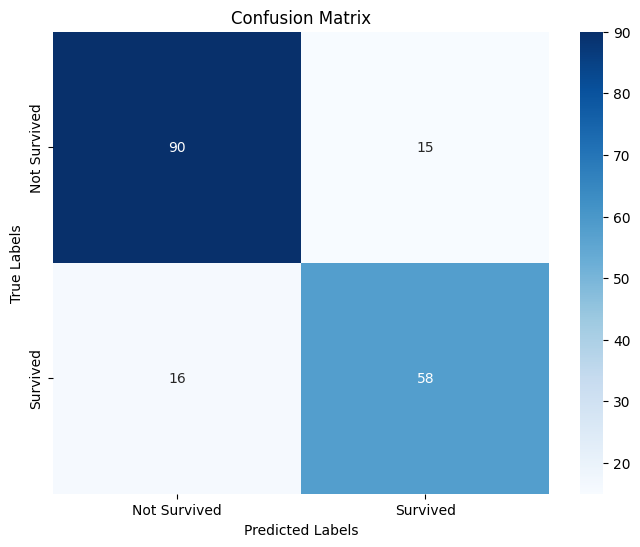

In [22]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

###**Saving the Model**

In [23]:
import pickle
with open("titanic_model.pkl", "wb") as file:
  pickle.dump(model, file)